# Monte Carlo Estimation

[Monte Carlo Estimation](http://en.wikipedia.org/wiki/Monte_Carlo_method) is a method of numerically estimating things which we don't (or can't) calculate numerically by randomly generating samples.  In this IPython Notebook, I'm going to use Monte Carlo Estimation to estimate:

1. The area under a curve
2. The value of $\pi$

## Monte Carlo Estimation of Area

Let's use [Monte Carlo Estimation](http://en.wikipedia.org/wiki/Monte_Carlo_method) to estimate the area onder this curve (from 0 to 10): 

$$y = 5 * \sin(6~x) + \sin(2~x) + 7$$

### Here are the basic steps:

1. Define a rectangle which encloses the part of the curve for which we want to find area.
2. Randomly generate points within that region.
3. Find which of the randomly generated points are under the curve by checking them against the equation of the function; for a point (x,y), it is under the curve if y <= f(x).
4. Find the ratio of the points under the curve to the points all the randomly generated points, and multipy that number by the area of the enclosing rectangle (see below for why).

#### Why do we need to multiply by the area of the rectangle?

1. $$\frac{area\ under\ curve}{area\ of\ rectangle} = \frac{points\ under\ curve}{points\ in\ rectangle}$$

2. $$area\ under\ curve\ =\ {area\ of\ rectangle}~(\frac{points\ under\ curve}{points\ in\ rectangle})$$


### Let's do it:

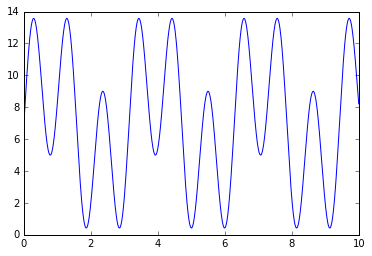

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import math

f = lambda x: 5 * np.sin(6 * x) + 3 * np.sin(2 * x) + 7
x = np.linspace(0, 10, 1000)
y = f(x)

_ = plt.plot(x,y)

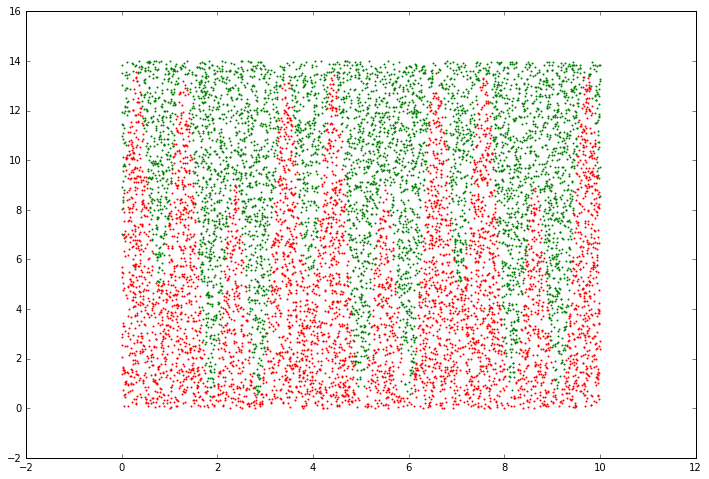

In [2]:
NUM_POINTS = 10000
rect_width = 10
rect_height = 14

rand_x = lambda: random.uniform(0, rect_width)
rand_y = lambda: random.uniform(0, rect_height)

points = [(rand_x(), rand_y()) for i in range(NUM_POINTS)]
points_under = [point for point in points if point[1] <= f(point[0])]
points_above = list(set(points) - set(points_under))

# Separate x's and y's to pass to scatter function.
(under_x, under_y) = zip(*list(points_under))
(over_x, over_y) = zip(*list(points_above))

fig = plt.figure()
fig.set_size_inches(12, 8)
_ = plt.scatter(under_x, under_y, s=1, color='red')
_ = plt.scatter(over_x, over_y, s=1, color='green')

In [3]:
# Area = area of domain rectangle * num_points_under/num_points_total
area = rect_width * rect_height * len(points_under)*1.0/len(points)
print("Estimate of area under the curve:", area)

# Sanity check: it looks like the area under is about half of the rectangle, and the rectangle
# area is 10*14 = 140, so it should be around 70.

Estimate of area under the curve: 71.89


---

## Monte Carlo Estimation of $\pi$

Let's draw a circle by randomly generating points in the space ($x$,$y$) such that $x^{2}+y^{2}\leq1$

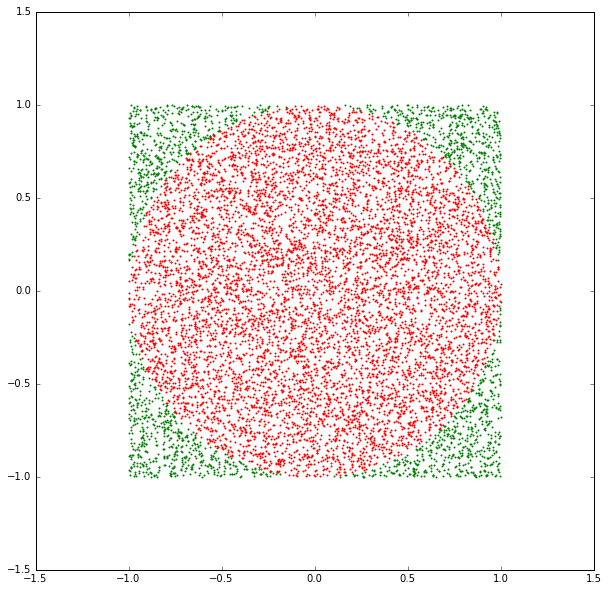

In [4]:
import random

NUM_POINTS = 10000

# Randomly generate points (x[i], y[i]) such that -1 <= x[i] = 1 and -1 <= y[i] <= 1.
x = [random.uniform(-1,1) for i in range(NUM_POINTS)]
y = [random.uniform(-1,1) for i in range(NUM_POINTS)]

circle_x = []
circle_y = []

outsiders_x = []
outsiders_y = []

# Determine which points are inside the circle (and for visualization purposes, also
# determine which are outside the circle).
for i in range(NUM_POINTS):
    if x[i]**2 + y[i]**2 <= 1:
        circle_x.append(x[i])
        circle_y.append(y[i])
    else:
        outsiders_x.append(x[i])
        outsiders_y.append(y[i])

# Plot it.
fig = plt.figure()
fig.set_size_inches(10, 10)
_ = plt.scatter(outsiders_x, outsiders_y, s=1, color='green')
_ = plt.scatter(circle_x, circle_y, s=1, color='red')

## Now let's estimate $\pi$

Here's a few facts:

* The area of a circle is $\pi r^2$.
* Since our circle only has a radius of 1, its area is $\pi$.
* The area of the square is $2*2 = 4$.
* The ratio of the **area of the circle** to the **area of the square** should be the same as the ratio of the **points inside the circle** to the **points inside the square**
* So the ratio of $\frac{\pi}{4} = \frac{circle\ points}{total\ points}$.  So $\pi = 4~\frac{circle\ points}{total\ points}$

In [5]:
print("Estimate of area of circle (pi):", 4 * (len(circle_x)*1.0 / len(x)))

Estimate of area of circle (pi): 3.1356
